# The journey begins

You have just arrived in the Big Apple and you would like to start your new autonomous fleet ride hailing empire.
To maximise your success, you managed to get your hands on some taxi booking data, which you can explore to make the most of your time and resources.

![](../enter-protagonist-left.jpg)

## Exploring the Data 

You start by looking at the data available and produce some useful plots which can help you make decisions on where to place your taxis to get the most customers.

### Objective 1: Identify the area in the city where you have maximum chance of finding a customer.

You start by looking at information you have to play with.

In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import module
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read data in pandas dataframe with data of all mondays in 2014-01
df2014 = pd.read_pickle('../data/train-2014.pickle')

# List first few rows (datapoints)
df2014.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
191,2014-01-08 21:55:58.0000006,6.5,2014-01-08 21:55:58+00:00,-73.998488,40.726303,-73.998488,40.726303,1
346,2014-01-01 05:22:00.00000048,5.0,2014-01-01 05:22:00+00:00,-73.994360,40.720390,-73.985770,40.723040,2
427,2014-01-29 22:41:00.000000131,21.0,2014-01-29 22:41:00+00:00,-73.978553,40.766717,-74.016195,40.711052,6
2148,2014-01-08 10:10:23.0000002,14.5,2014-01-08 10:10:23+00:00,-73.955414,40.785375,-73.975062,40.745991,1
2249,2014-01-01 01:11:21.0000008,10.5,2014-01-01 01:11:21+00:00,-73.990954,40.717289,-74.014721,40.709721,1


You decide that it would be useful to visualise the bookings start locations on a 2D grid to see where the highest density of bookings began.

In [13]:
# Plot a section of the map of NYC using the NYC Open Data
BB_custom_small = (-74.0616, -73.7374, 40.5798, 40.8798)

# Load a presaved image of the map
nyc_map = plt.imread('../nyc_BB_custom_small.png')

# Functions to plot data on the NYC map
def plot_pickup_on_map(df, map_png, BB, s=1, alpha=0.1):
    axs = plt.figure(figsize=(18,14))
    plt.scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='g', s=s)
    plt.xlim((BB[0], BB[1]))
    plt.ylim((BB[2], BB[3]))
    plt.title('Pickup locations')
    plt.imshow(map_png, zorder=0, extent=BB)
    
def plot_pickup_2d_hist_on_map(df, map_png, BB, cmap, alpha, bins):
    fig = plt.figure(figsize=(18,10))
    h = plt.hist2d(
        df.pickup_longitude,
        df.pickup_latitude,
        bins=bins,
        cmap=cmap,
        alpha=0.6, 
        cmin=1)
    plt.colorbar()
    plt.imshow(map_png, zorder=0, extent=BB)
    plt.title('Pickup hotspots')
    return h

def plot_dropoff_2d_hist_on_map(df, map_png, BB, cmap, alpha, bins):
    fig = plt.figure(figsize=(18,10))
    g = plt.hist2d(
        df.dropoff_longitude,
        df.dropoff_latitude,
        bins=bins,
        cmap=cmap,
        alpha=0.6, 
        cmin=1)
    plt.colorbar()
    plt.imshow(map_png, zorder=0, extent=BB)
    plt.title('Dropoff hotspots')
    return g

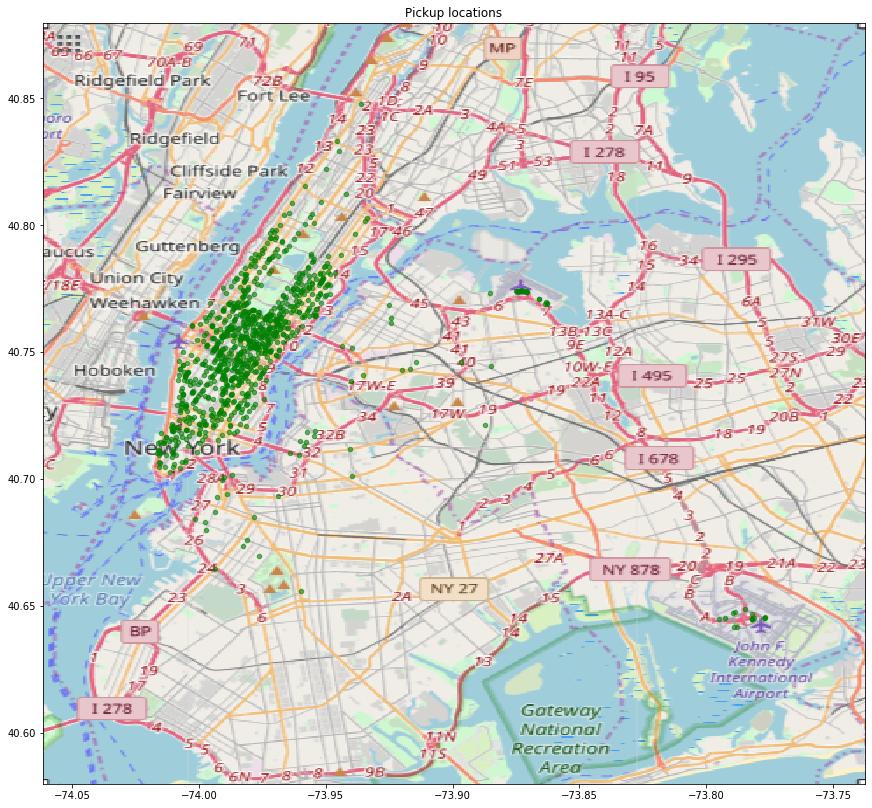

In [14]:
# Here we plot the pickup and dropoff points
plot_pickup_on_map(df2014, nyc_map, BB_custom_small, s=20, alpha=0.6)

So this is nice, but you notice it is quite difficult to visually draw a conclusion as to where the highest density of bookings started. What would be better is to display the density of plots in smaller binned areas.

_We will restrict the datapoints to a smaller geographical area around NYC bounded defined by the following:_
        - latitudes = (40.5798, 40.8798)
        - longtitudes = (-74.0616, -73.7374)

In [15]:
# Here a mask is applied that restricts the datapoints
mask = module.select_within_boundingbox(df2014, BB_custom_small)
df_plot = df2014[mask]

_A function has been written for you which plots the density of pickup/dropoff locations from the chosen data in NYC for all Wednesdays in January 2014._

 - The function returns the 2D histogram of binned pickup locations and its values in h.

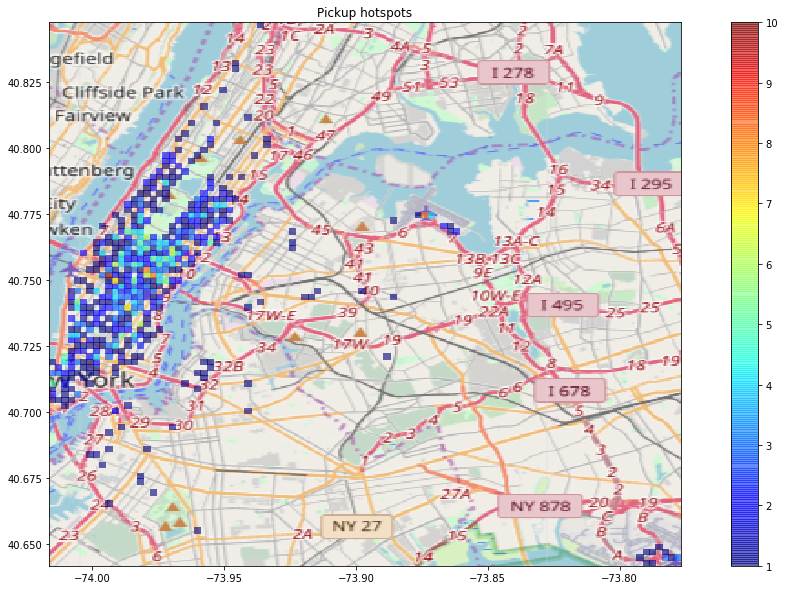

In [16]:
h = plot_pickup_2d_hist_on_map(df_plot, nyc_map, BB_custom_small, 'jet', 0.8, 100)

### Task 1:

You could visually try to figure out where exactly the most popular area is, but you decide to automate the process. 

Complete the function `arg_hotspot()` to find the argument (lat, lon) of the most popular pickup/dropoff locations.


Make sure your function returns the index of both the latitude and longitude.
 

In [17]:
# Write a function to find the index of the largest bin in the histogram
def arg_hotspot(hist):
    # Write code here: hist --> longitude, latitude
    maxi = np.nanmax(hist)
    
#     sorted_hist = np.sort
    for (indy,indx), val in np.ndenumerate(hist):
        if val == maxi:
            checkpnt = ((indy,indx), val)
    return checkpnt[0][0], checkpnt[0][1]

In [18]:
# Optional: To test that your function is returning the output as expected run this cell to get lon, lat
print(h[1][arg_hotspot(h[0])[0]], h[2][arg_hotspot(h[0])[1]])

-73.99484672999999 40.75085565


In [19]:
location = module.generate_json(h, arg_hotspot)

In [20]:
module.show_location_on_map(location)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [21]:
# Run this cell to check your answer
module.check_p1q1(h[1][arg_hotspot(h[0])[0]], h[2][arg_hotspot(h[0])[1]])

Correct!


### Objective 2: Identify the most expensive pickup areas.

To do this, you can plot out the booking end locations as well and visualise the earnings as a colour. 

In [22]:
weight = df_plot.fare_amount

# creates 2 more columns that specifies the lat long of the bin that booking belongs to 
df_plot.loc[:,'fare_group_pu_bin_lon'] = 0
df_plot.loc[:,'fare_group_pu_bin_lat'] = 0

# assigns the (lat, lon) of a bin to a booking for pu
a = zip(h[1],h[2])
b = zip(h[1][1:],h[2][1:])
a = list(a)
b = list(b)
for index, row in df_plot.iterrows():
    for i,_ in enumerate(b):
        if (a[i][0] < row['pickup_longitude'] < b[i][0]):
            df_plot['fare_group_pu_bin_lon'].loc[index] = i
            break
for index, row in df_plot.iterrows():                
    for i,_ in enumerate(b):
        if (a[i][1] < row['pickup_latitude'] < b[i][1]):
            df_plot['fare_group_pu_bin_lat'].loc[index] = i
            break
            
df_plot.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_group_pu_bin_lon,fare_group_pu_bin_lat
191,2014-01-08 21:55:58.0000006,6.5,2014-01-08 21:55:58+00:00,-73.998488,40.726303,-73.998488,40.726303,1,7,41
346,2014-01-01 05:22:00.00000048,5.0,2014-01-01 05:22:00+00:00,-73.994360,40.720390,-73.985770,40.723040,2,9,38
427,2014-01-29 22:41:00.000000131,21.0,2014-01-29 22:41:00+00:00,-73.978553,40.766717,-74.016195,40.711052,6,15,60
2148,2014-01-08 10:10:23.0000002,14.5,2014-01-08 10:10:23+00:00,-73.955414,40.785375,-73.975062,40.745991,1,25,69
2249,2014-01-01 01:11:21.0000008,10.5,2014-01-01 01:11:21+00:00,-73.990954,40.717289,-74.014721,40.709721,1,10,36


### Task 2:

Now that you have assigned bins to each booking. You want to know which bin is most profitable on average.
To do that: Write code to find mean fare per bin. Store it in a variable called `grouped_pickup`.

_Hint: You can leverage Pandas functionality_

In [23]:
# Write code to find the average fare per bin for pickup
grouped_pickup = df_plot.groupby(['fare_group_pu_bin_lon', 'fare_group_pu_bin_lat']).mean()

In [24]:
# plot of the aggregated fare amounts per bin
agg_fare_pu_amount = grouped_pickup.reset_index()
x_pu = agg_fare_pu_amount.fare_group_pu_bin_lon.values
y_pu = agg_fare_pu_amount.fare_group_pu_bin_lat.values
z_pu = agg_fare_pu_amount.fare_amount.values

def fill_bins(x,y,z):
    Z = np.zeros((100,100))
    xyz = list(zip(x,y,z))
    v=0
    for item in xyz:
        v+=1
        c=0
        for ii, _ in np.ndenumerate(Z):
            if ii == item[0:2]:
                Z[item[0]][item[1]] = item[2]
                break
            c+=1
    return xyz

xyz_pu = fill_bins(x_pu,y_pu,z_pu)

# convert between indices and lon lats
lat = np.linspace(h[2][0], h[2][-1], 100)
lon = np.linspace(h[1][0], h[1][-1], 100)

lonlatfare_pu = [(lon[item[0]], lat[item[1]], item[2]) for item in xyz_pu]

# finds the top 10 most profitable locations on average
def get_top_N(N, list_):
    top = sorted(list_, key=lambda x: x[2])
    top_N = top[-N:]
    top_N = np.asarray(top_N)
    return top_N.tolist()

In [25]:
top_pickup = get_top_N(3, lonlatfare_pu)

In [27]:
module.show_locations_on_map(top_pickup)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [30]:
# Run this cell to check your implemetation
import module
module.check_p1q2(top_pickup)

False. Try Again.


Text(0.5, 1.0, 'Pickup hotspots')

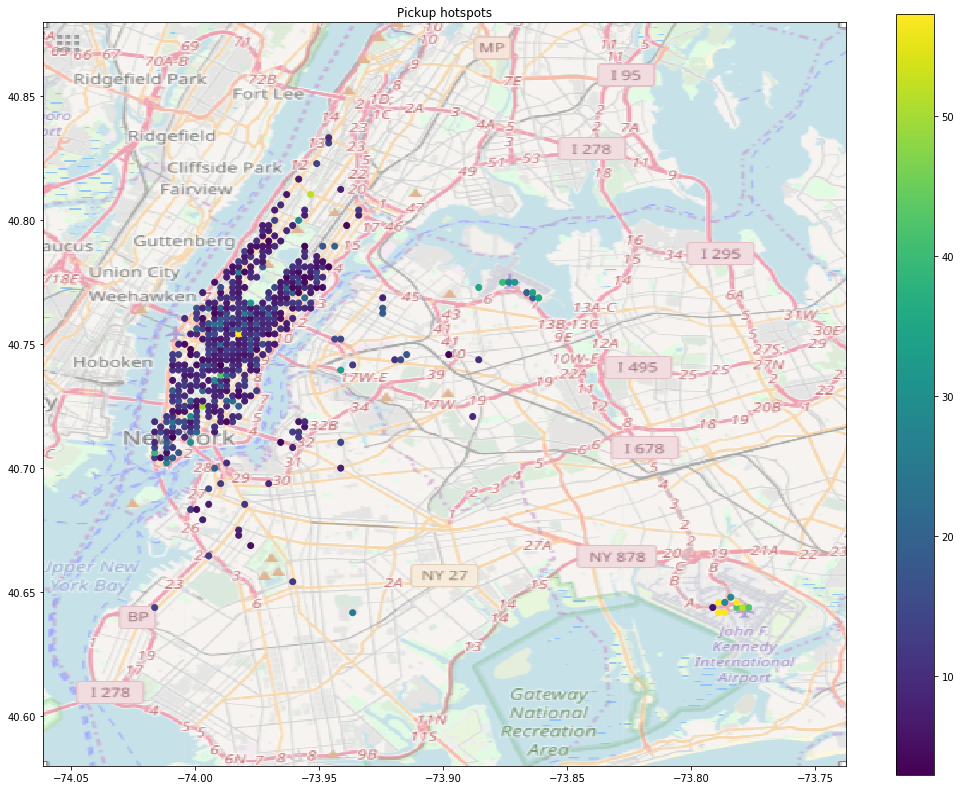

In [31]:
# plots the grouped average fare per pickup bin
lonlatfare_pu = np.asarray(lonlatfare_pu)
plt.figure(figsize=(18,14))
plt.scatter(lonlatfare_pu[:,0],lonlatfare_pu[:,1], c=lonlatfare_pu[:,2])
plt.colorbar()
plt.imshow(nyc_map, extent=BB_custom_small, alpha=0.6)
plt.title('Pickup hotspots')

Well Done! You now know where to start your venture. Continue to the next notebook.